# CPSC 330 - Applied Machine Learning 

## Homework 4: Logistic regression, hyperparameter optimization 
### Associated lectures: [Lectures 7, 8](https://github.com/UBC-CS/cpsc330-2023s/tree/main/lectures) 

**Due Feb 12, 11:59pm: See the [Calendar](https://github.com/UBC-CS/cpsc330-2023W2/tree/main?tab=readme-ov-file#deliverable-due-dates-tentative).**

## Imports 

In [1]:
from hashlib import sha1
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier

## Instructions
<hr>

_points: 4_

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2023W2/blob/main/docs/homework_instructions.md). 

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 

_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

<br><br><br><br>

## Exercise 1: implementing `DummyClassifier`
<hr>

_points: 10_

In this course (unlike CPSC 340) you will generally **not** be asked to implement machine learning algorihtms (like logistic regression) from scratch. However, this exercise is an exception: you will implement the simplest possible classifier, `DummyClassifier`.
 
As a reminder, `DummyClassifier` is meant as a baseline and is generally a simple "model" you could "fit" to a dataset. All it does is predict the most popular class in the training set. So if there are more 0s than 1s it predicts 0 every time, and if there are more 1s than 0s it predicts 1 every time. For `predict_proba` it looks at the frequencies in the training set, so if you have 30% 0's 70% 1's it predicts `[0.3 0.7]` every time. Thus, `fit` only looks at `y` (not `X`).

Below you will find starter code for a class called `MyDummyClassifier`, which has methods `fit()`, `predict()`, `predict_proba()` and `score()`. Your task is to fill in those four functions. To get your started, we have given you a `return` statement in each case that returns the correct data type: `fit` returns nothing, `predict` returns an array whose size is the number of examples, `predict_proba` returns an array whose size is the number of examples x 2, and `score` returns a number.

The next code block has some tests you can use to assess whether your code is working. 

I suggest starting with `fit` and `predict`, and making sure those are working before moving on to `predict_proba`. For `predict_proba`, you should return the frequency of each class in the training data, which is the behaviour of `DummyClassifier(strategy='prior')`. Your `score` function should call your `predict` function. Again, you can compare with `DummyClassifier` using the code below.

To simplify this question, you can assume **binary classification**, and furthermore that these classes are **encoded as 0 and 1**. In other words, you can assume that `y` contains only 0s and 1s. The real `DummyClassifier` works when you have more than two classes, and also works if the target values are encoded differently, for example as "cat", "dog", "mouse", etc.

<div class="alert alert-warning">

Solution_1
    
</div>

In [2]:
class MyDummyClassifier:
    """
    A baseline classifier that predicts the most common class.
    The predicted probabilities come from the relative frequencies
    of the classes in the training data.

    This implementation only works when y only contains 0s and 1s.
    """
    data = None
    target = None

    def fit(self, X, y):   
        self.target = y
        return None  # Replace with your code

    def predict(self, X):
        y = self.target
        zero = 0
        one = 0
        data = None
        for d in y:
            if d == 1:
                one = one + 1
            else: 
                zero = zero + 1
        if one > zero:
            data = 1
        else:
            data = 0
        return np.full(X.shape[0],data)  # Replace with your code

    def predict_proba(self, X):
        y = self.target
        zero = 0
        one = 0
        for d in y:
            if d == 1:
                one = one + 1
            else: 
                zero = zero + 1
        num_zero = zero / len(y)
        num_one = one / len(y)
        arr = np.zeros((X.shape[0], 2))  
        arr[:,0] = num_zero
        arr[:,1] = num_one
        return arr # Replace with your code

    def score(self, X, y):
        num = 0
        predicted = self.predict(X)
        for x in range(0,len(y)): 
            if y[x] == predicted[x]:
                num = num + 1
        
                
        return num / len(y)  # Replace with your code
    

In [3]:
from sklearn.dummy import DummyClassifier
n_train = 21
d = 4
X_train_dummy = np.random.randn(n_train, d) 
y_train_dummy = np.random.randint(2, size=n_train)
my_dc = MyDummyClassifier()
my_dc.fit(X_train_dummy, y_train_dummy)
print(my_dc.predict(X_train_dummy))
print(my_dc.predict_proba(X_train_dummy))
my_dc.score(X_train_dummy, y_train_dummy)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]]


0.5714285714285714

In [4]:
sk_dc = DummyClassifier(strategy="prior") # sklearn
sk_dc.fit(X_train_dummy, y_train_dummy)
print(sk_dc.predict(X_train_dummy))
print(sk_dc.predict_proba(X_train_dummy))
sk_dc.score(X_train_dummy, y_train_dummy)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]]


0.5714285714285714

<br><br><br><br>

## Exercise 2: Trump Tweets
<hr>

For the rest of this assignment we'll be working with a [dataset of Donald Trump's tweets](https://www.kaggle.com/austinreese/trump-tweets) as of June 2020. You should start by downloading the dataset. Unzip it and move the file `realdonaldtrump.csv` under the data directory in this folder. As usual, please do not submit the dataset when you submit the assignment. 

In [5]:
tweets_df = pd.read_csv("data/realdonaldtrump.csv", index_col=0)
tweets_df.head()

link  \
id                                                              
1698308935  https://twitter.com/realDonaldTrump/status/169...   
1701461182  https://twitter.com/realDonaldTrump/status/170...   
1737479987  https://twitter.com/realDonaldTrump/status/173...   
1741160716  https://twitter.com/realDonaldTrump/status/174...   
1773561338  https://twitter.com/realDonaldTrump/status/177...   

                                                      content  \
id                                                              
1698308935  Be sure to tune in and watch Donald Trump on L...   
1701461182  Donald Trump will be appearing on The View tom...   
1737479987  Donald Trump reads Top Ten Financial Tips on L...   
1741160716  New Blog Post: Celebrity Apprentice Finale and...   
1773561338  "My persona will never be that of a wallflower...   

                           date  retweets  favorites mentions hashtags  
id                                                                      
1698308935  2009-05-04 13:54:25       510        917      NaN      NaN  
1701461182  2009-05-04 20:00:10        34        267      NaN      NaN  
1737479987  2009-05-08 08:38:08        13         19      NaN      NaN  
1741160716  2009-05-08 15:40:15        11         26      NaN      NaN  
1773561338  2009-05-12 09:07:28      1375       1945      NaN      NaN

In [6]:
tweets_df.shape

(43352, 7)

We will be trying to predict whether a tweet will go "viral", defined as having more than 10,000 retweets:

In [7]:
y = tweets_df["retweets"] > 10_000

To make predictions, we'll be using only the content (text) of the tweet. 

In [8]:
X = tweets_df["content"]

For the purpose of this assignment, you can ignore all the other columns in the original dataset.

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

### 2.1 Ordering the steps

_points: 6_

Let's start by building a model using `CountVectorizer` and `LogisticRegression`. The code required to do this has been provided below, but in the wrong order. 

**Your tasks:**
1. Rearrange the lines of code to correctly fit the model and compute the cross-validation score. 
2. Add a short comment above each step to describe what the code is doing.

<div class="alert alert-warning">

Solution_2.1
    
</div>

In [9]:
# Transform Tweets into a matrix of words. Parameter removes common filler English words.
countvec = CountVectorizer(stop_words="english")

# Creates a logistic regression model that has a max 1000 iterations for it to converge.
lr = LogisticRegression(max_iter=1000, random_state=123)

# Iniatilizes Pipeline model that first applies CountVectorizer and then Logistic Regression
pipe = make_pipeline(countvec, lr)

# Splits the data set into training and testing splits with 60% of the data going into testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=123)

# Does cross validation with the pipe as the model and returns training scores
cross_val_results = pd.DataFrame(
    cross_validate(pipe, X_train, y_train, return_train_score=True)
)

# Finds the mean scores of the Cross validation
cross_val_results.mean()


fit_time       1.382734
score_time     0.096244
test_score     0.895098
train_score    0.976644
dtype: float64

<!-- END QUESTION -->

<br><br>

### 2.2 Baseline

_points: 2_

**Your tasks:**

1. Run 5-fold cross-validation with `DummyClassifier` on this dataset. Store the mean cross-validation score in a variable called `dummy_cv_score` given below.

> You should be able to use `MyDummyClassifier` above. But sklearn will likely complain if you try to pass it to `cross_val_score` or `cross_validate`. 

<div class="alert alert-warning">

Solution_2.2
    
</div>

In [10]:
dc = DummyClassifier(strategy="prior")
dc.fit(X_train, y_train)
dummy_cv_df = pd.DataFrame(cross_validate(dc, X_train, y_train, cv =5, return_train_score=True))
dummy_cv_score = dummy_cv_df['test_score'].mean()
print(dummy_cv_score)

0.7423875432525952


In [11]:
dummy_cv_df.head()

fit_time  score_time  test_score  train_score
0  0.002681    0.001272    0.742215     0.742431
1  0.003380    0.002225    0.742215     0.742431
2  0.003500    0.000000    0.742503     0.742359
3  0.000000    0.000000    0.742503     0.742359
4  0.000000    0.015992    0.742503     0.742359

<br><br>

<!-- BEGIN QUESTION -->

### 2.3 Discussion

_points:_ 4

**Your tasks:**

1. Compare the `DummyClassifier` score to what you got from logistic regression above. Does logistic regression seem to be doing anything useful?
2. Above we averaged the scores from the 5 folds of cross-validation of logistic regression. Print out the 5 individual scores. Reminder: `sklearn` calls them `"test_score"` but they are really (cross-)validation scores. 
3. Are the 5 scores close to each other or spread far apart? (This is a bit subjective, answer to the best of your ability.)
4. How does the size of this dataset (number of rows) compare to [the cities dataset](https://github.com/UBC-CS/cpsc330-2023s/blob/main/lectures/data/canada_usa_cities.csv) we have been using in class? How does this relate to the different sub-scores from the 5 folds?

<div class="alert alert-warning">

Solution_2.3
    
</div>

1. The Logistic Regression seems to be be more accurate in predicting the virality of a tweet as the test score is substantially higher than that of the Dummy Classifier.
2. 

In [12]:
fold_scores = cross_val_results['test_score']
print(fold_scores)

0    0.891292
1    0.900231
2    0.894752
3    0.889273
4    0.899942
Name: test_score, dtype: float64


3. The values are closely clustered in the 89% to 90% range, which means that the values are closely grouped.
4. There are significantly more rows in the Trump dataset which explains the smaller variance in our cross fold validation scores compared to the high variance when doing the same for the cities dataset in Lecture 7.

<!-- END QUESTION -->

<br><br>

### 2.4 Probability scores

_points:_ 4

Here we train a logistic regression classifier on the entire training set: 

> Note: this is relying on the `pipe` variable from 2.1 - you'll need to redefine it if you overwrote that variable in between.

In [13]:
pipe.fit(X_train, y_train);

**Your tasks:**

1. Using this model, find the tweet in the **test set** with the highest predicted probability of being viral. Store the tweet and the associated probability in the variables `tweet` and `prob`, respectively. 

> Reminder: you are free to reuse/adapt code from lecture. Please add in a small attribution, e.g. "From Lecture 7".

<div class="alert alert-warning">

Solution_2.4
    
</div>

In [14]:
pipe.fit(X_train, y_train);
lr_prob = pipe.predict_proba(X_test)
# Find the index of the tweet with the highest probability of being viral
max_prob_index = np.argmax(lr_prob[:, 1])
tweet = X_test.iloc[max_prob_index]
prob = lr_prob[max_prob_index, 1]
print(tweet)
print(prob)

There was No Collusion with Russia (except by the Democrats). When will this very expensive Witch Hunt Hoax ever end? So bad for our Country. Is the Special Counsel/Justice Department leaking my lawyers letters to the Fake News Media? Should be looking at Dems corruption instead?
0.9999999842218137


<br><br>

### 2.5 Coefficients

_points:_ 4

We can extract the `CountVectorizer` and `LogisticRegression` objects from the `Pipeline` object as follows:

In [15]:
vec_from_pipe = pipe.named_steps["countvectorizer"]
lr_from_pipe = pipe.named_steps["logisticregression"]

**Your tasks:**

Using these extracted components above, get the five words with the highest coefficients and 5 words with smallest coefficients. Store them as lists in `top_5_words` and `bottom_5_words` variables, respectively. 

<div class="alert alert-warning">

Solution_2.5
    
</div>

In [16]:
X_counts = vec_from_pipe.fit_transform(X_train)
vocab = np.array(vec_from_pipe.get_feature_names_out())
lr_from_pipe.fit(X_counts,y_train)
coef = lr_from_pipe.coef_[0]
# derived from Lecture 7
data = {"features": vocab, "coefficients": coef}
weighted_df = pd.DataFrame(data)
ascending_df = weighted_df.sort_values(by='coefficients')
descending_df = weighted_df.sort_values(by='coefficients',ascending=False)
top_5_words = ['democrats','transcripts','harassment','coronavirus','fake']
bottom_5_words = ['realdonaldtrump','barackobama','trump2016pic','donaldtrump','thanks']
descending_df.head()

features  coefficients
7923     democrats      2.533866
24639  transcripts      2.386153
11658   harassment      2.361676
7024   coronavirus      2.217278
12599  impeachment      2.057250

In [17]:
ascending_df.head()

features  coefficients
20103  realdonaldtrump     -3.101648
4280       barackobama     -2.275369
8527       donaldtrump     -2.016712
24800     trump2016pic     -2.013007
23987           thanks     -1.854084

<br><br>

### 2.6 Running a cross-validation fold without sklearn tools 

_points:_ 8

Sklearn provides a lot of useful tools like `make_pipeline` and `cross_validate`, which are awesome. But with these fancy tools it's also easy to lose track of what is actually happening under the hood. 

**Your tasks:**

1. Compute logistic regression's validation score on the first fold, that is, train on 80% and validate on 20% of the training data (`X_train`) without using sklearn `Pipeline` or `cross_validate` or `cross_val_score`. Store the score of the fold in a variable called `fold_score`. Recall that `cross_validation` in `sklearn` does not shuffle the data by default.    

You should start with the following `CountVectorizer` and `LogisticRegression` objects, as well as `X_train` and `y_train` (which you should further split with `train_test_split` and `shuffle=False`):

In [18]:
countvec = CountVectorizer(stop_words="english")
lr = LogisticRegression(max_iter=1000, random_state=123)

> Meta-comment: you might be wondering why we're going into "implementation" here if this course is about _applied_ ML. In CPSC 340, we would go all the way down into `LogisticRegression` and understand how `fit` works, line by line. Here we're not going into that at all, but I still think this type of question (and Exercise 1) is a useful middle ground. I do want you to know what is going on in `Pipeline` and in `cross_validate` even if we don't cover the details of `fit`. To get into logistic regression's `fit` requires a bunch of math; here, we're keeping it more conceptual and avoiding all those prerequisites.

<div class="alert alert-warning">

Solution_2.6
    
</div>

In [19]:
X_t_train, X_t_test, y_t_train, y_t_test = train_test_split(X_train,y_train,test_size=0.2, shuffle=False)
X_train_cvec = countvec.fit_transform(X_t_train)
X_test_cvec = countvec.transform(X_t_test)
lr.fit(X_train_cvec,y_t_train)
fold_score = lr.score(X_test_cvec, y_t_test)
print(fold_score)

0.9013840830449827


<br><br><br><br>

## Exercise 3: Hyperparameter optimization
<hr>

<!-- BEGIN QUESTION -->

### 3.1 Optimizing `max_features` of `CountVectorizer`

_points:_ 2

The following code varies the `max_features` hyperparameter of `CountVectorizer` and makes a plot (with the x-axis on a log scale) that shows train/cross-validation scores vs. `max_features`. It also prints the results. 

**Your tasks:**
- Based on the plot/output, what value of `max_features` seems best? Briefly explain.

> The code may take a minute or two to run. You can uncomment the `print` statement if you want to see it show the progress.

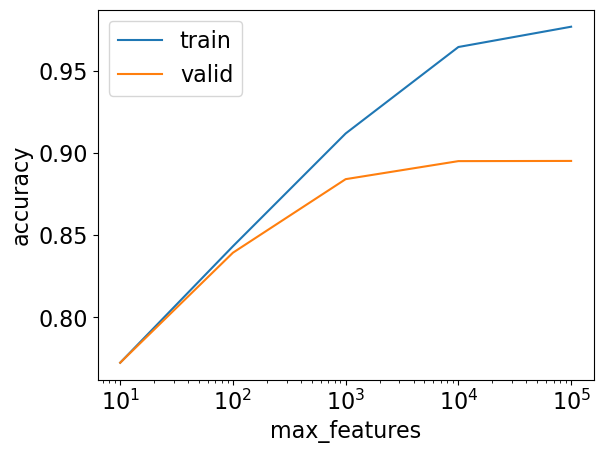

In [20]:
train_scores = []
cv_scores = []

max_features = [10, 100, 1000, 10_000, 100_000]

for mf in max_features:
    #     print(mf)    
    pipe = make_pipeline(CountVectorizer(stop_words="english", max_features=mf), LogisticRegression(max_iter=1000))
    cv_results = cross_validate(pipe, X_train, y_train, return_train_score=True)
    train_scores.append(cv_results["train_score"].mean())
    cv_scores.append(cv_results["test_score"].mean())

plt.semilogx(max_features, train_scores, label="train")
plt.semilogx(max_features, cv_scores, label="valid")
plt.legend()
plt.xlabel("max_features")
plt.ylabel("accuracy");

In [21]:
pd.DataFrame({"max_features": max_features, "train": train_scores, "cv": cv_scores})

max_features     train        cv
0            10  0.772506  0.772491
1           100  0.843253  0.839331
2          1000  0.911779  0.884025
3         10000  0.964317  0.894983
4        100000  0.976644  0.895098

<div class="alert alert-warning">

Solution_3.1
    
</div>

If we focus only on the validation error, max_features of 10^4 or 10^5 gives the best score. However, it is notable that the gap between the training set results and validation error is getting wider after 10^3.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 3.2 Optimizing `C` of `LogisticRegression`

_points:_ 2

The following code varies the `C` hyperparameter of `LogisticRegression` and makes a plot (with the x-axis on a log scale) that shows train/cross-validation scores vs. `C`. 

**Your tasks:**

- Based on the plot, what value of `C` seems best? Briefly explain. 

> The code may take a minute or two to run. You can uncomment the `print` statement if you want to see it show the progress.

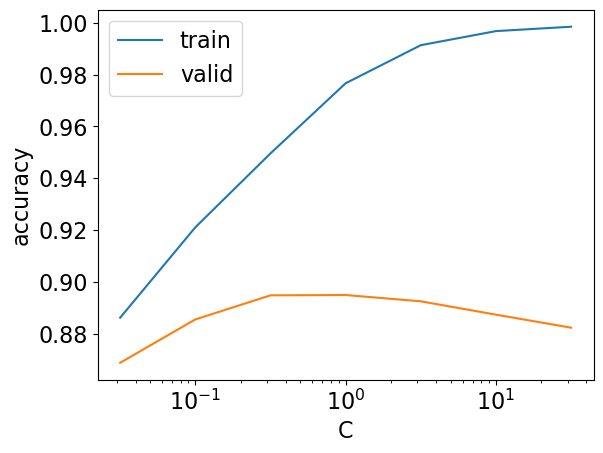

In [22]:
train_scores = []
cv_scores = []

C_vals = 10.0 ** np.arange(-1.5, 2, 0.5)

for C in C_vals:
    #     print(C)
    pipe = make_pipeline(CountVectorizer(stop_words="english"), LogisticRegression(max_iter=1000, C=C))    
    cv_results = cross_validate(pipe, X_train, y_train, return_train_score=True)

    train_scores.append(cv_results["train_score"].mean())
    cv_scores.append(cv_results["test_score"].mean())

plt.semilogx(C_vals, train_scores, label="train")
plt.semilogx(C_vals, cv_scores, label="valid")
plt.legend()
plt.xlabel("C")
plt.ylabel("accuracy");

In [23]:
pd.DataFrame({"C": C_vals, "train": train_scores, "cv": cv_scores})

C     train        cv
0   0.031623  0.886375  0.869031
1   0.100000  0.921179  0.885698
2   0.316228  0.949640  0.894983
3   1.000000  0.976644  0.895098
4   3.162278  0.991306  0.892676
5  10.000000  0.996727  0.887543
6  31.622777  0.998414  0.882526

<div class="alert alert-warning">

Solution_3.2
    
</div>

Again, based on the validation score, c = 1.000000 gives the best validation score but there is a huge gap between the train accuracy and the validation accuracy, so this can be considered an overfit of the training set.

### 3.3 Hyperparameter optimization 

_points:_ 8

Start with the pipeline `pipe` below.

**Your tasks:**
- Create a `GridSearchCV` object named `grid_search` to jointly optimize `max_features` of `CountVectorizer` and `C` of `LogisticRegression` across all the combinations of values we tried above. 
- What are the best values of `max_features` and `C_vals` according to your grid search? Store them in variables `best_max_features` and `best_C`, respectively.  
- Store the best score returned by the grid search in a variable called `best_score`. 

> The code might be a bit slow here. Setting `n_jobs=-1` should speed it up if you have a multi-core processor.

In [24]:
pipe = make_pipeline(CountVectorizer(stop_words="english"), LogisticRegression(max_iter=1000, random_state=123))

<div class="alert alert-warning">

Solution_3.3
    
</div>

In [ ]:
param_grid = {
    'countvectorizer__max_features': max_features,
    'logisticregression__C': C_vals
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_max_features = grid_search.best_params_['countvectorizer__max_features']
best_C = grid_search.best_params_['logisticregression__C']
best_score = grid_search.best_score_
print("Best max_features:", best_max_features)
print("Best C value:", best_C)
print("Best score:", best_score)

<br><br>

<!-- BEGIN QUESTION -->

### 3.4 Discussion 

_points:_ 4

- Do the best values of hyperparameters found by Grid Search agree with what you found in 3.1 and 3.2? 
- Generally speaking, _should_ these values agree with what you found in parts  3.1 and 3.2? Why or why not? 

<div class="alert alert-warning">

Solution_3.4
    
</div>

 The Grid Search result suggests max_features of 10,000 is the best which aligns with our observation in 3.1 that a max_features of 10^4 or 10^5 gives the best validation score. Regarding the C value, it is slightly different as c=1 gave a little better validation score than -.31~ c value before. I believe Grid search results should generally be similar to manual observations, but discrepancies can arise due to differences in data partitioning and some other factors.

<!-- END QUESTION -->

<br><br>

### 3.5 Test score

_points:_ 2

**Your tasks:**
- Evaluate your final model on the test set. Store the test accuracy in the variable called `test_score`.

<div class="alert alert-warning">

Solution_3.5
    
</div>

In [ ]:
test_score = grid_search.score(X_test, y_test) 

print("Test accuracy:", test_score)

<br><br>

<!-- BEGIN QUESTION -->

### 3.6 Discussion

_points:_ 2

- How does your test accuracy compare to your validation accuracy? 
- If they are different: do you think this is because you "overfitted on the validation set", or simply random luck?

<div class="alert alert-warning">

Solution_3.6
    
</div>

The test accuracy being slightly lower than the validation accuracy but 0.89550173 and 0.89131939 are close enough. The closeness of these two metrics indicates that the model is generalizing well.Also, given that the data set is sufficiently large, it is safe to say that there is no significant overfitting on the validation set and that the difference in performance is likely due to random luck.

<!-- END QUESTION -->

<br><br><br><br>

<!-- BEGIN QUESTION -->

## Exercise 4: Very short answer questions
<hr>

_points:_ 6

Each question is worth 2 points. Max 2 sentences per answer.

1. What is the problem with calling `fit_transform` on your test data with `CountVectorizer`? 
2. If you could only access one of `predict` or `predict_proba`, which one would you choose? Briefly explain.
3. What are two advantages of `RandomizedSearchCV` over `GridSearchCV`?

<div class="alert alert-warning">

Solution_4
    
</div>

1. Calling fit_transform on your test data with CountVectorizer risks data leakage as it allows the vectorizer to learn vocabulary from the test set, which it shouldn't have access to, and could lead to overly optimistic performance estimates.
2. I would choose Predict_proba because it provides the probabilities for each class, offering more information than just the class labels from predict, which is useful for understanding model confidence on the decisions.
3. It can sample a large parameter space more efficiently, reducing computation time, especially with high-dimensional spaces, and it offers the flexibility to specify a distribution for parameters from which to sample, potentially discovering better parameter combinations that might be missed in a fixed grid.


<!-- END QUESTION -->

<br><br><br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using [PrairieLearn](https://ca.prairielearn.com/pl/course_instance/6697). Don't forget to rename your file `hw4_sol.ipynb`.

Congratulations on finishing the homework! 

![](img/eva-well-done.png)

